In [ ]:
!nvidia-smi

Fri Jan 27 22:56:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [57]:
import os
HOME = os.getcwd()
print(HOME)

/Users/saketh/Documents/Hackathons/new_stuff


In [66]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="oGEPyZ9XV0QrGyBrCADb")
project = rf.workspace("saketh-rajesh-oxmnz").project("groc-cctic")
dataset = project.version(4).download("yolov8")








mkdir: /Users/saketh/Documents/Hackathons/new_stuff/datasets: File exists
/Users/saketh/Documents/Hackathons/new_stuff/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.180, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to groc-4 in yolov8:: 100%|██████████| 546/546 [00:00<00:00, 7114.47it/s]


## Custom Training

In [67]:
%cd {HOME}

# print(dataset.location)

!yolo task=detect device=mps mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=300 plots=True

/Users/saketh/Documents/Hackathons/new_stuff
/Users/saketh/Documents/Hackathons/new_stuff/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Ultralytics YOLOv8.0.180 🚀 Python-3.9.6 torch-2.0.1 MPS (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/saketh/Documents/Hackathons/new_stuff/datasets/groc-4/data.yaml, epochs=50, patience=50, batch=16, imgsz=300, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False

In [61]:
!ls /Users/saketh/Documents/Hackathons/FoodSnap/runs/detect/train22

F1_curve.png                    results.png
PR_curve.png                    train_batch0.jpg
P_curve.png                     train_batch1.jpg
R_curve.png                     train_batch2.jpg
args.yaml                       train_batch520.jpg
confusion_matrix.png            train_batch521.jpg
confusion_matrix_normalized.png train_batch522.jpg
labels.jpg                      val_batch0_labels.jpg
labels_correlogram.jpg          val_batch0_pred.jpg
results.csv                     weights


/content


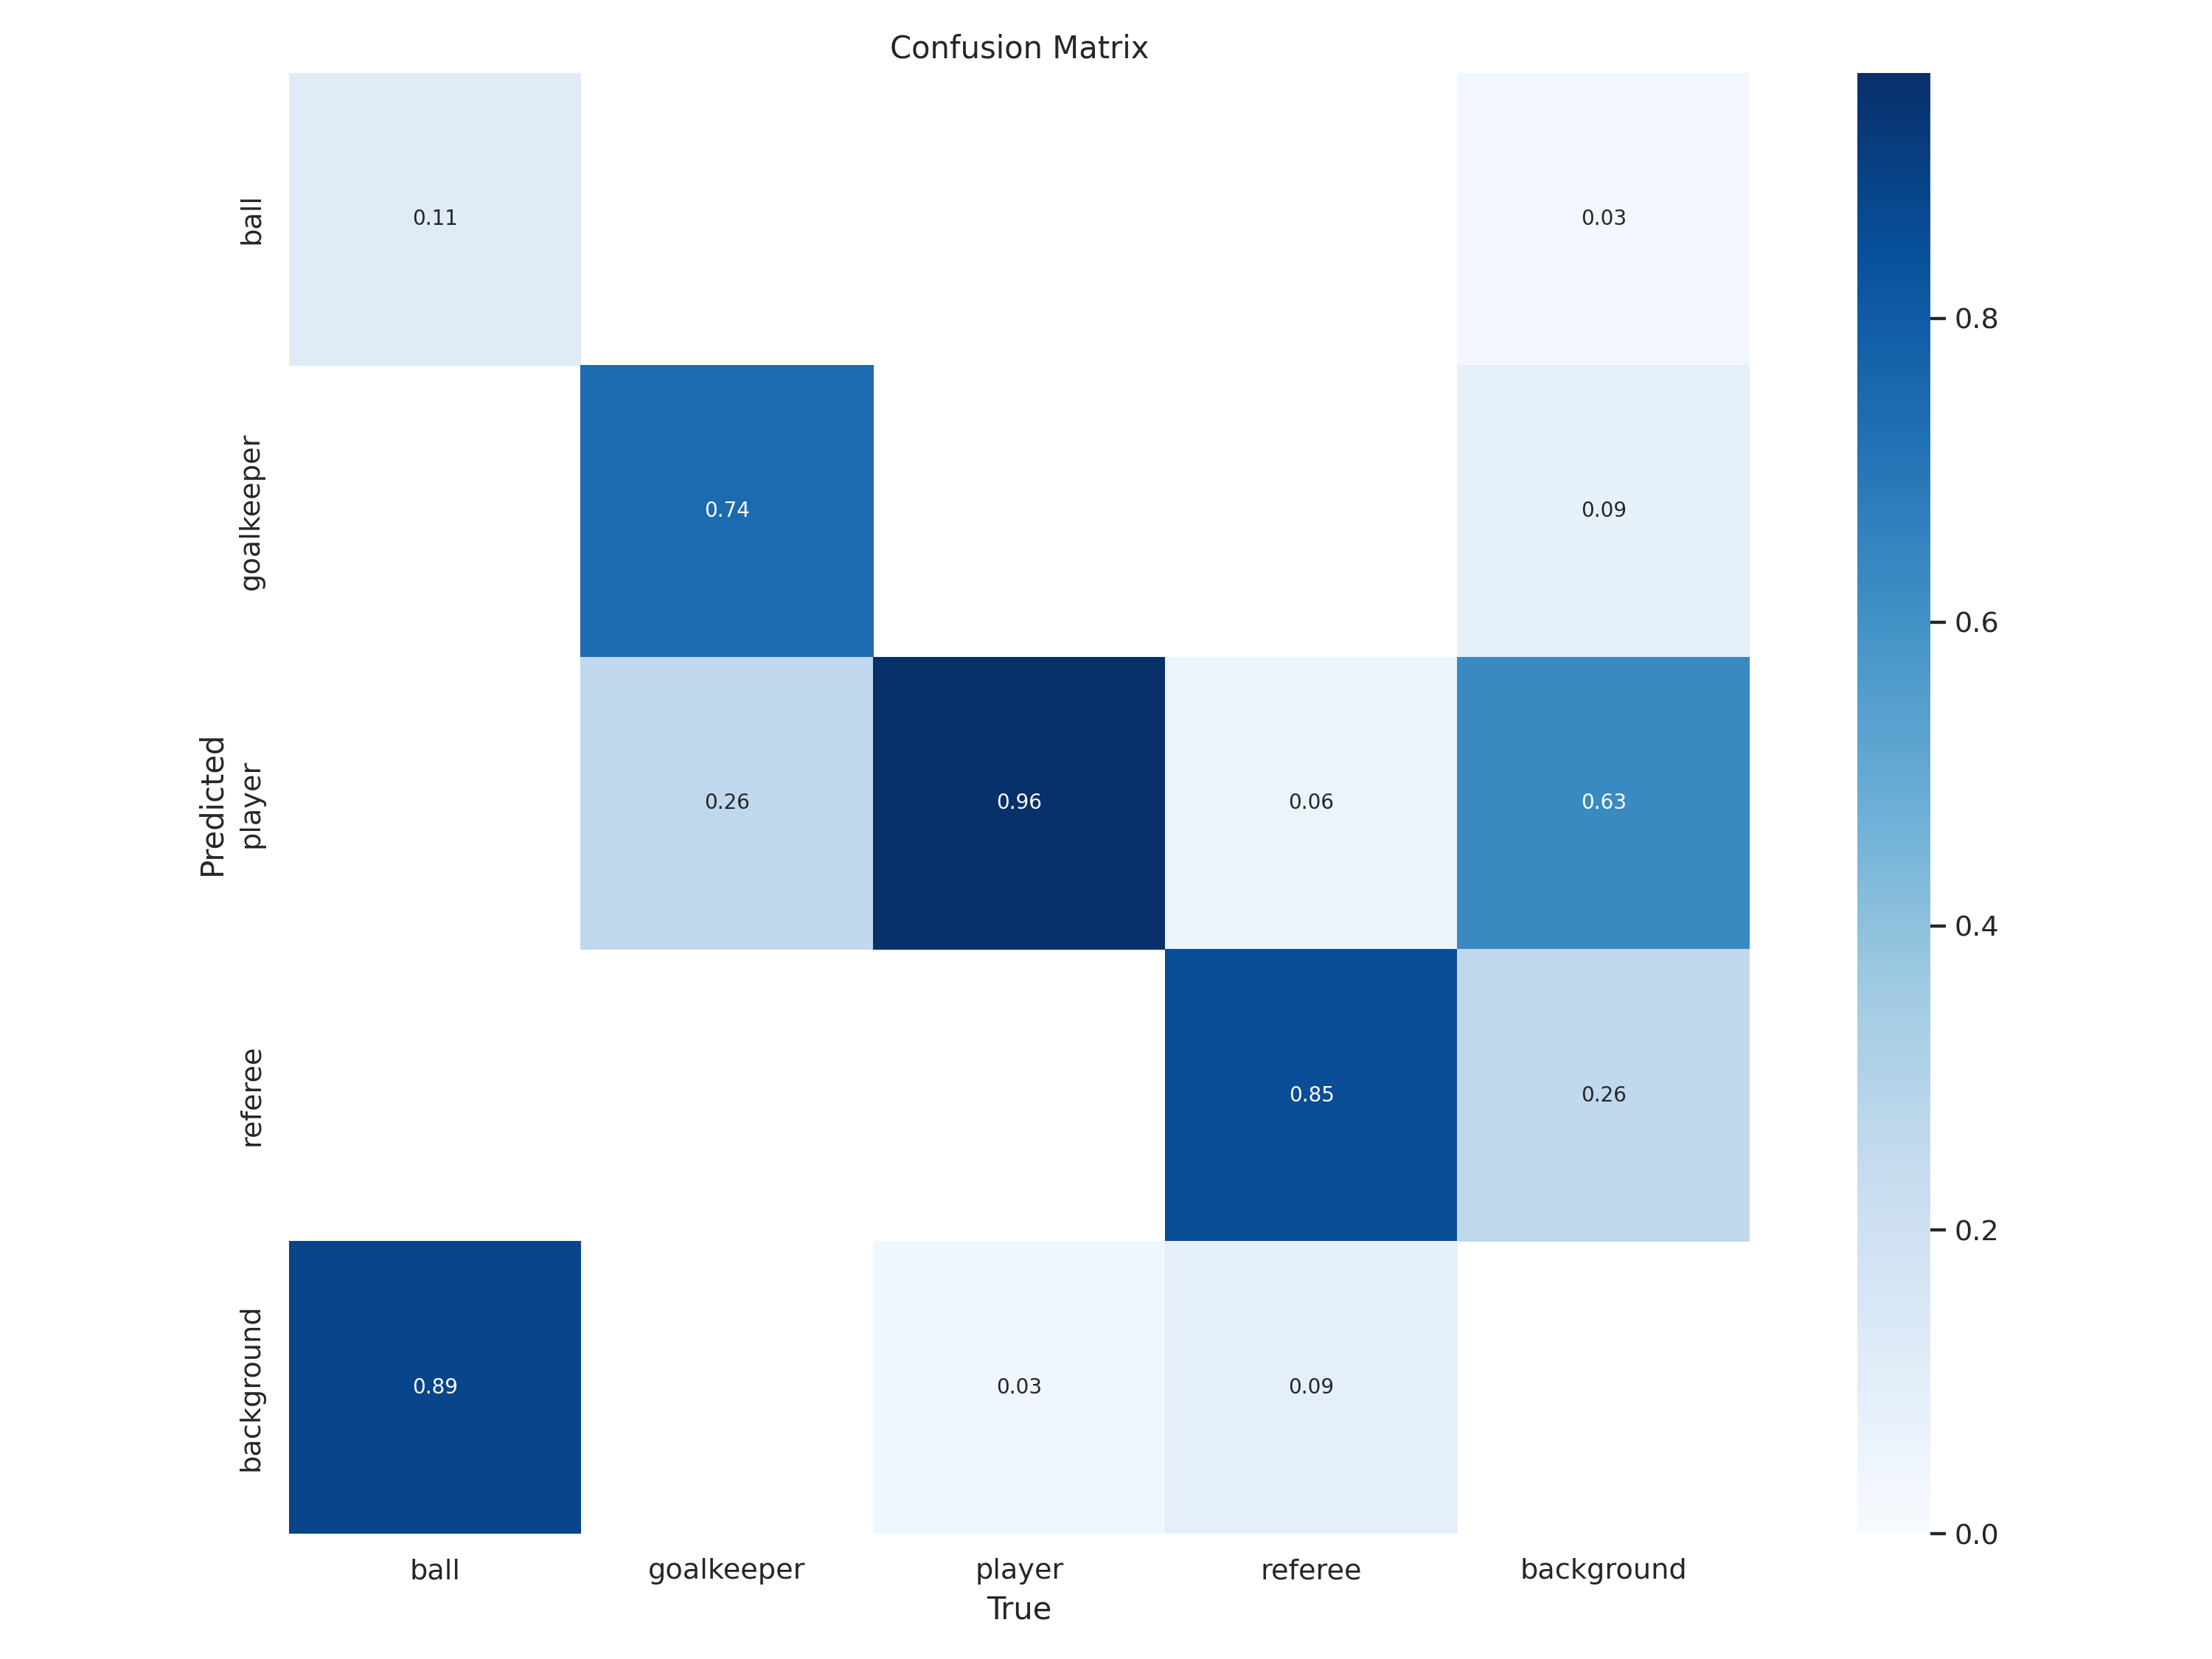

In [ ]:
%cd {HOME}
Image(filename=f' ../runs/detect/train/confusion_matrix.png', width=600)

/content


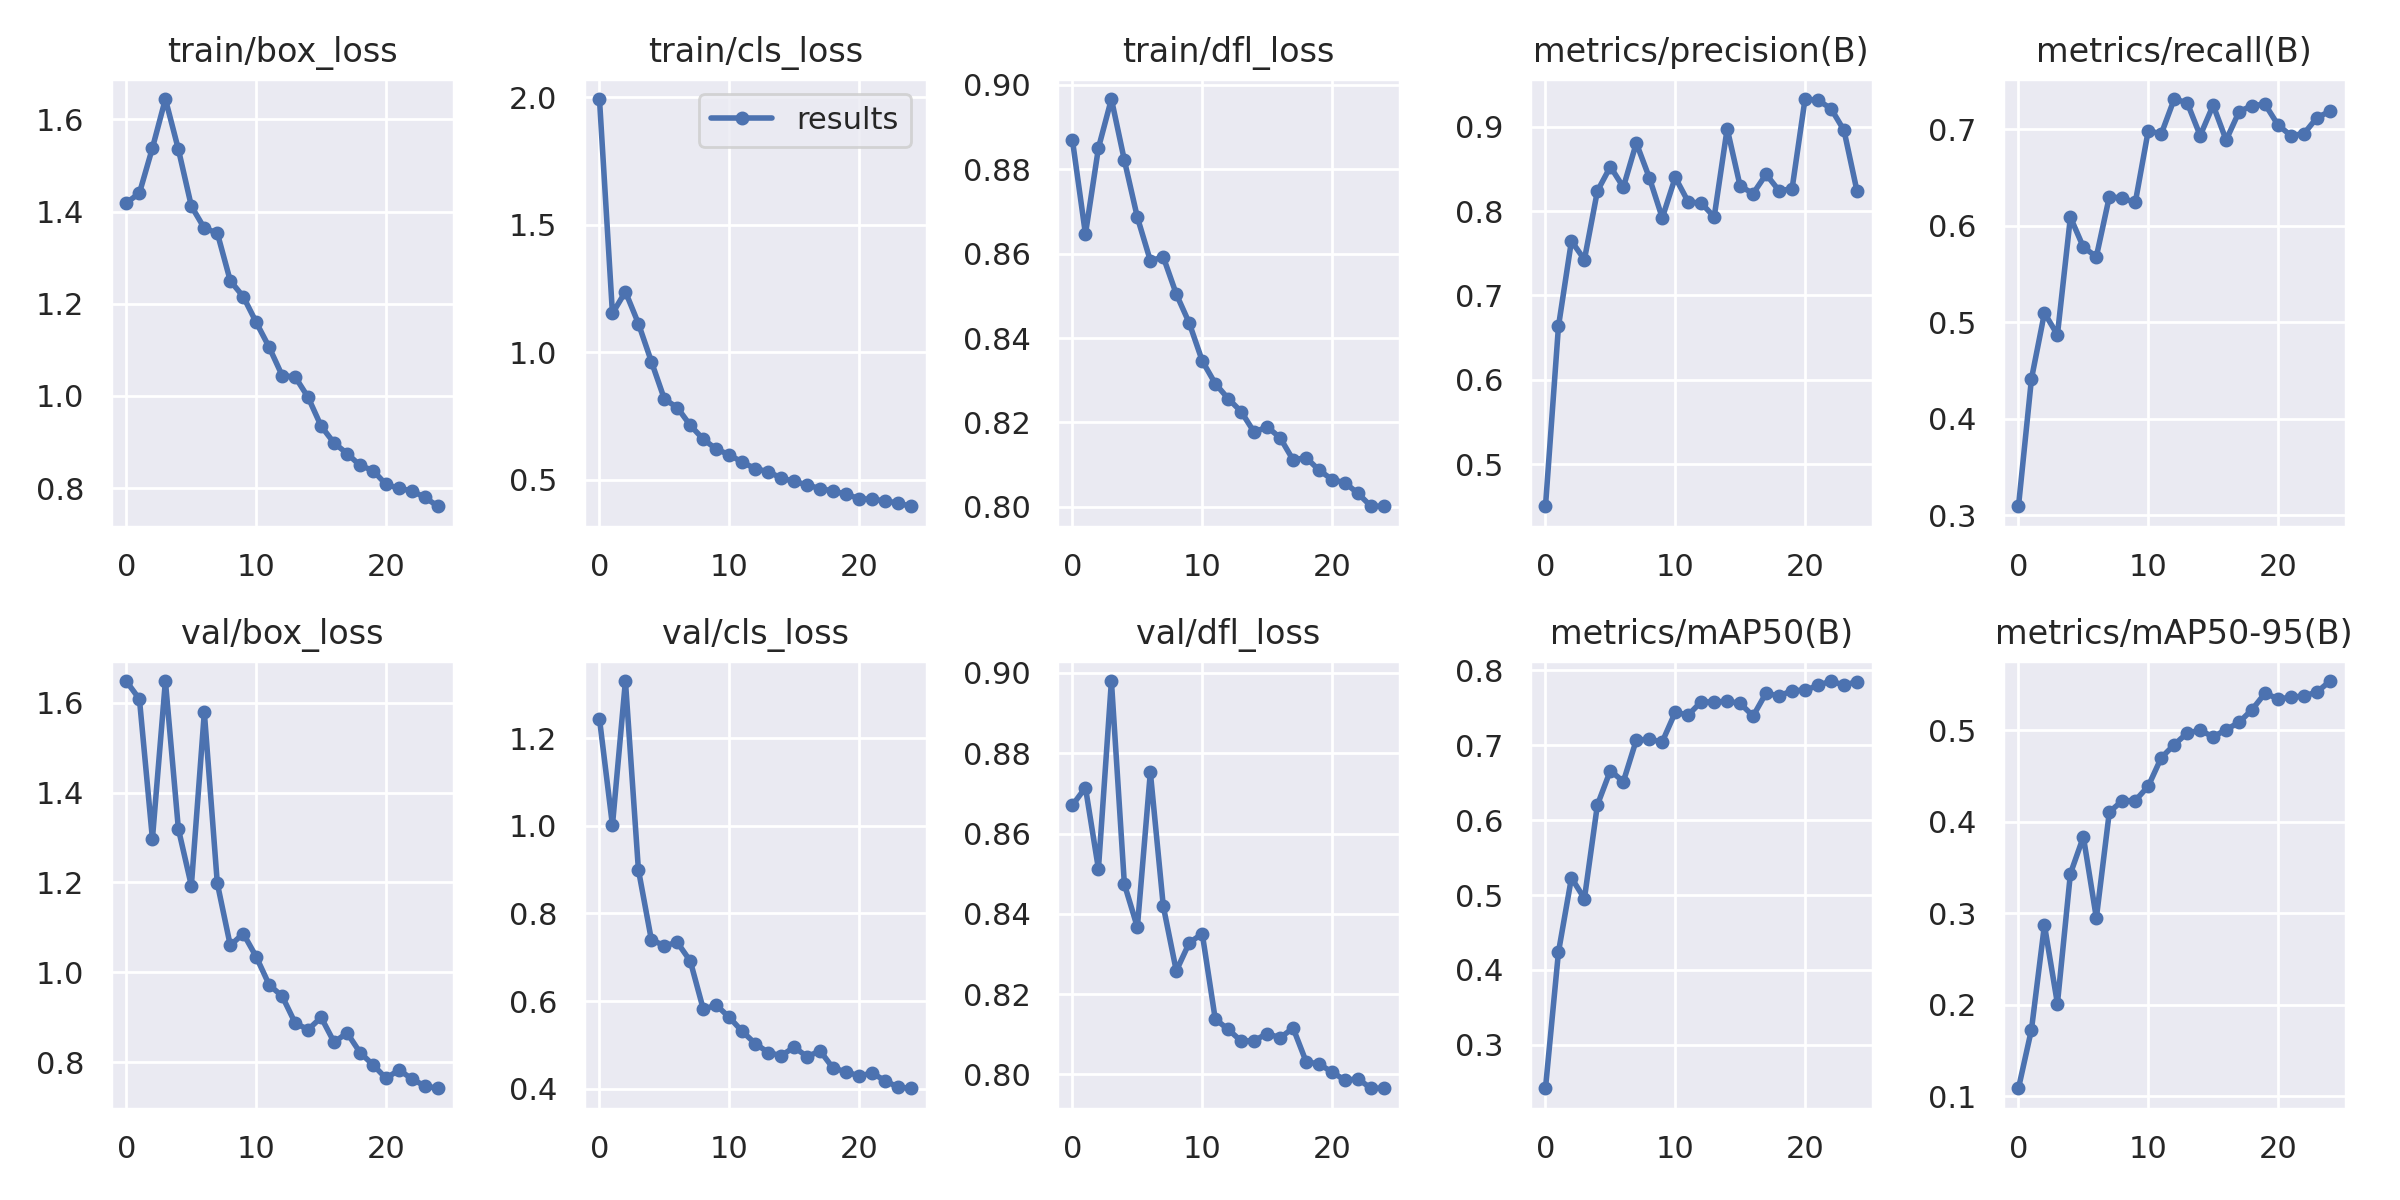

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [62]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect22/train/val_batch0_pred.jpg', width=600)

/Users/saketh/Documents/Hackathons/new_stuff


FileNotFoundError: [Errno 2] No such file or directory: '/Users/saketh/Documents/Hackathons/new_stuff/runs/detect22/train/val_batch0_pred.jpg'

## Validate Custom Model

In [63]:
%cd {HOME}

!yolo task=detect mode=val model=/Users/saketh/Documents/Hackathons/FoodSnap/runs/detect/train22/weights/best.pt data={dataset.location}/data.yaml

/Users/saketh/Documents/Hackathons/new_stuff
/Users/saketh/Documents/Hackathons/new_stuff/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Ultralytics YOLOv8.0.180 🚀 Python-3.9.6 torch-2.0.1 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients
val: Scanning /Users/saketh/Documents/Hackathons/new_stuff/datasets/groc-3/valid
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         14         26      0.763      0.989      0.968      0.742
                 apple         14          3      0.441          1      0.753      0.508
                 bread         14          1      0.693          1      0.995      0.796
                carrot         14          4      0.683          1      0.995        0.6
  

## Inference with Custom Model

In [64]:
%cd {HOME}
!yolo task=detect mode=predict model=/Users/saketh/Documents/Hackathons/FoodSnap/runs/detect/train20/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/Users/saketh/Documents/Hackathons/new_stuff
/Users/saketh/Documents/Hackathons/new_stuff/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Ultralytics YOLOv8.0.180 🚀 Python-3.9.6 torch-2.0.1 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients

image 1/17 /Users/saketh/Documents/Hackathons/new_stuff/datasets/groc-3/test/images/IMG_2261_JPG.rf.1e2e6c4e0602187f65c433c625856c6c.jpg: 320x320 (no detections), 53.2ms
image 2/17 /Users/saketh/Documents/Hackathons/new_stuff/datasets/groc-3/test/images/IMG_2262_JPG.rf.97eec5f43eb9735f9ade8e1dc69b561b.jpg: 320x320 1 rice bag, 40.2ms
image 3/17 /Users/saketh/Documents/Hackathons/new_stuff/datasets/groc-3/test/images/IMG_2266_JPG.rf.f35f2720631abd1effd03f1f0ff56b1f.jpg: 320x320 (no detections), 38.0ms
image 4/17 /Us

**NOTE:** Let's take a look at few results.

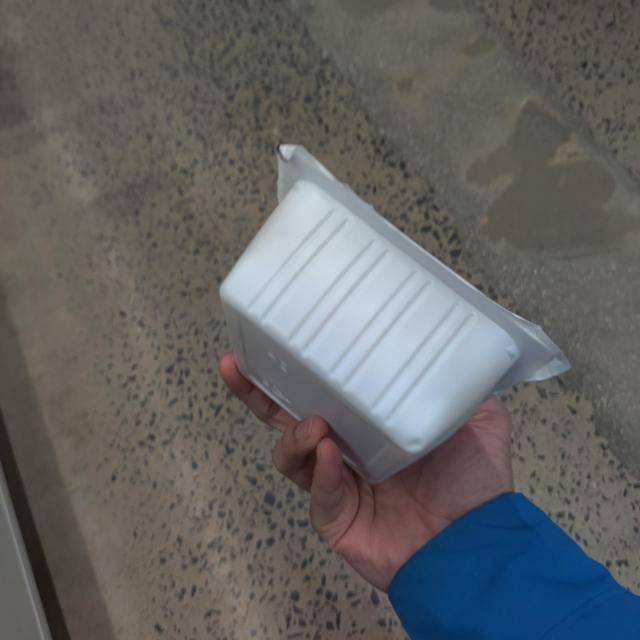

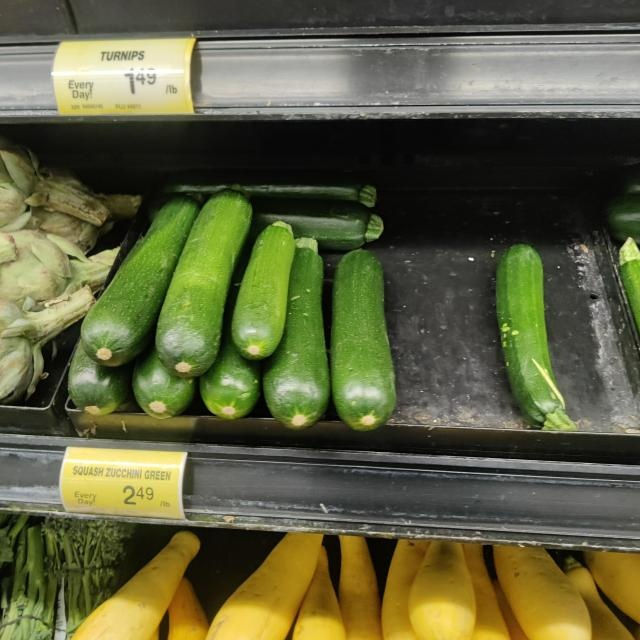

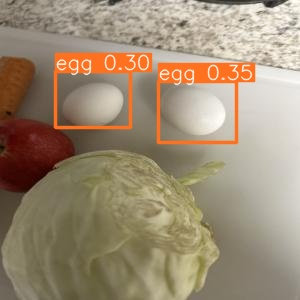

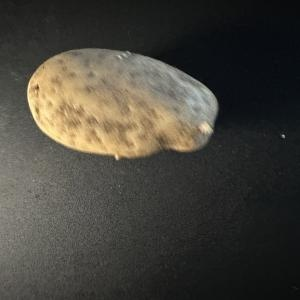

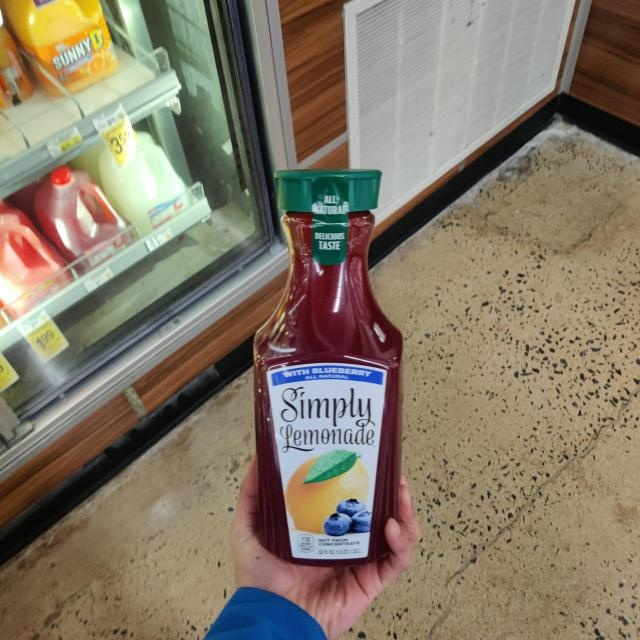

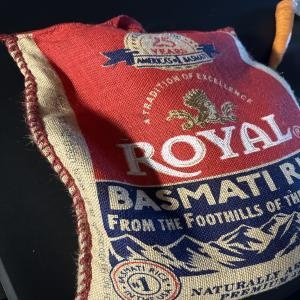

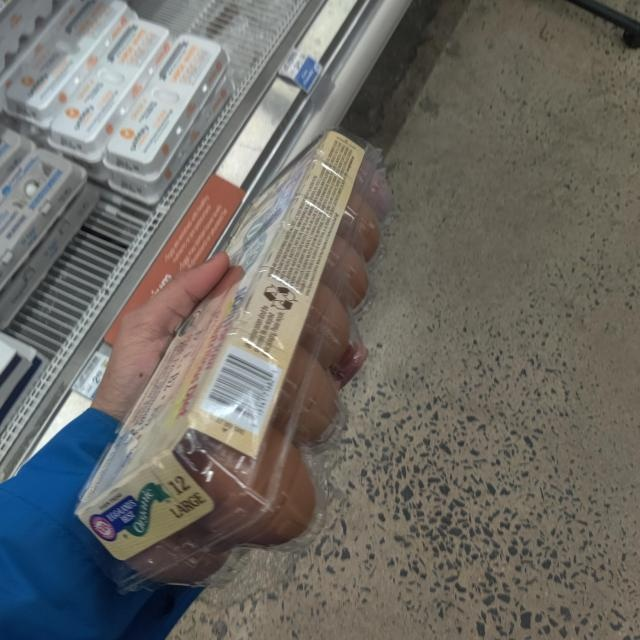

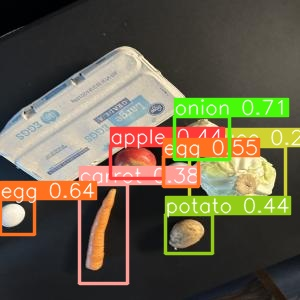

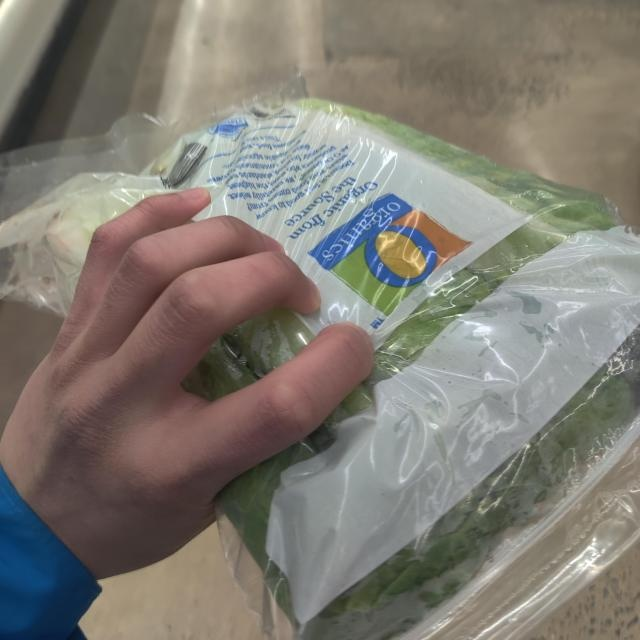

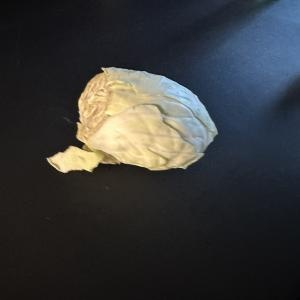

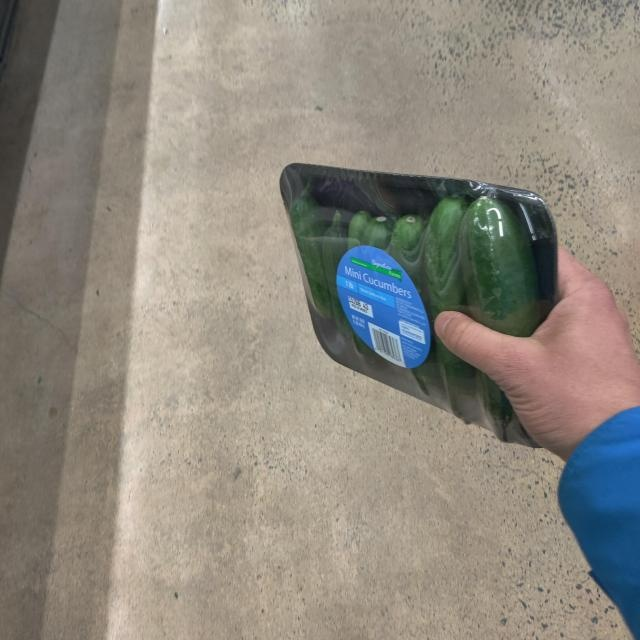

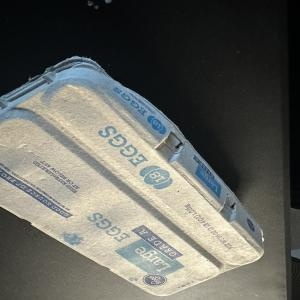

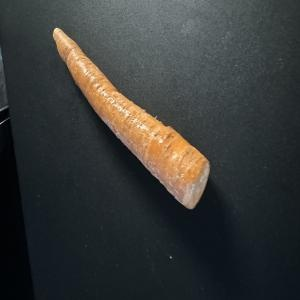

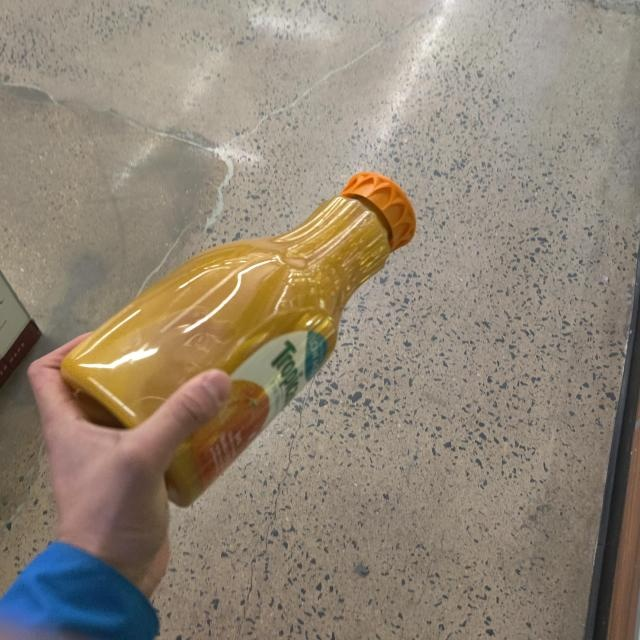

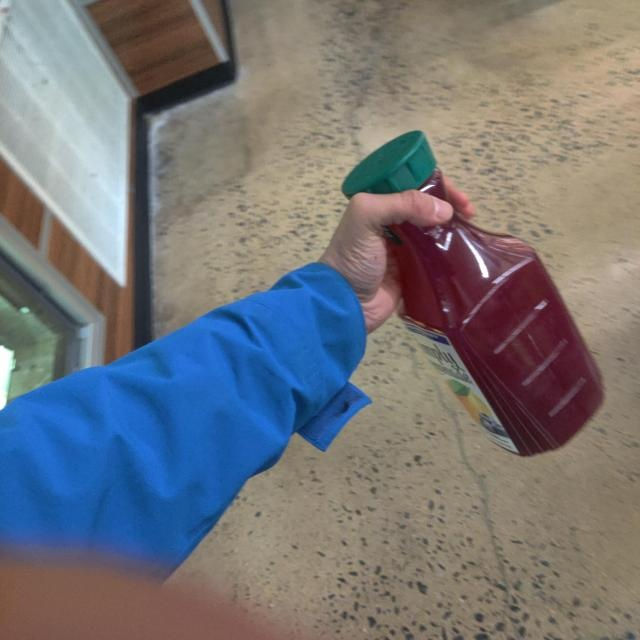

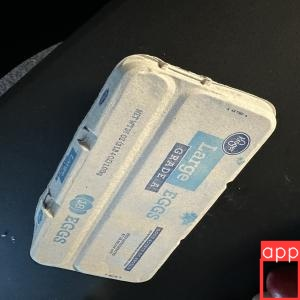

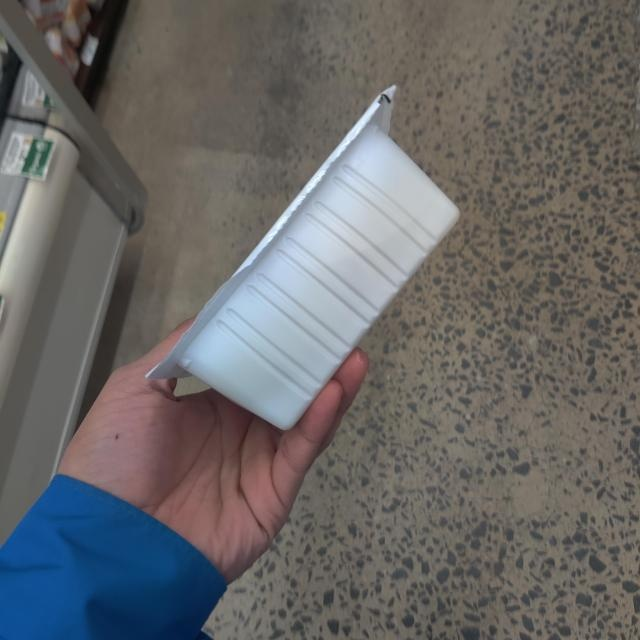

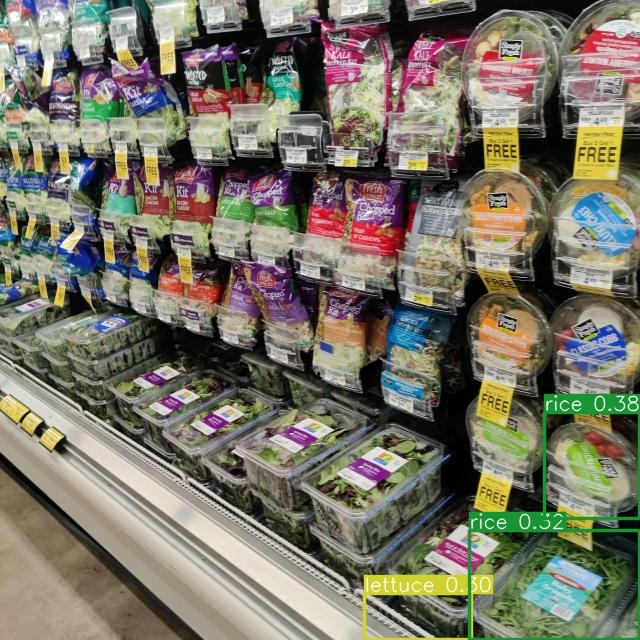

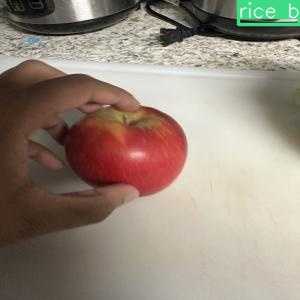

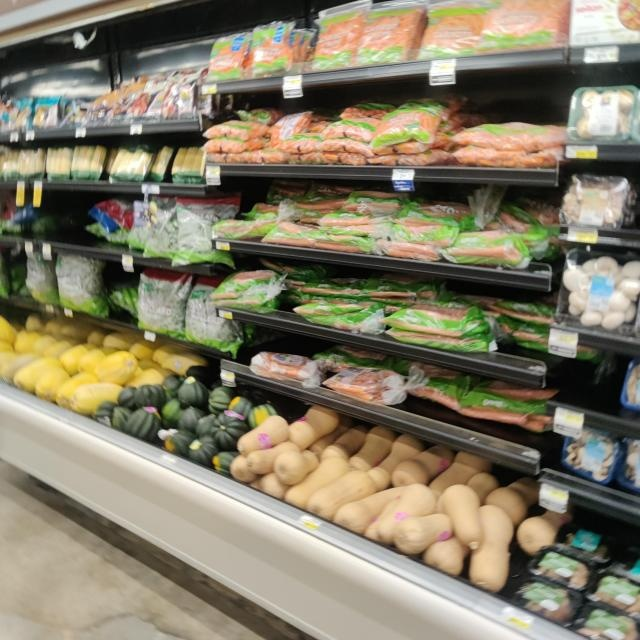

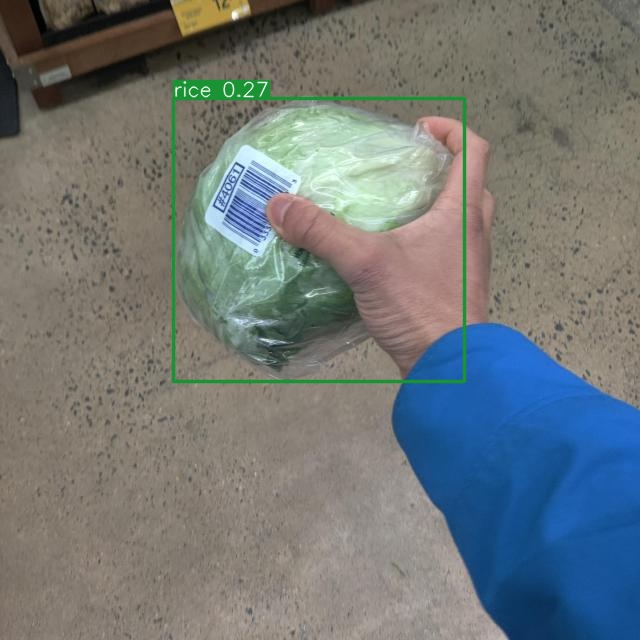

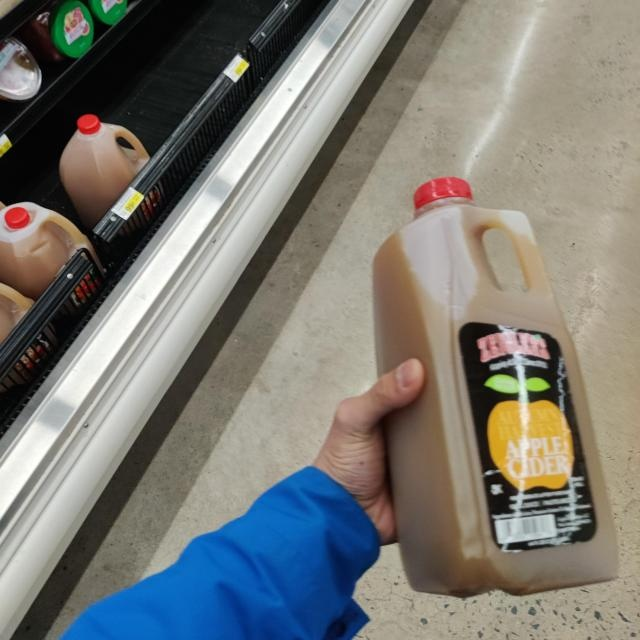

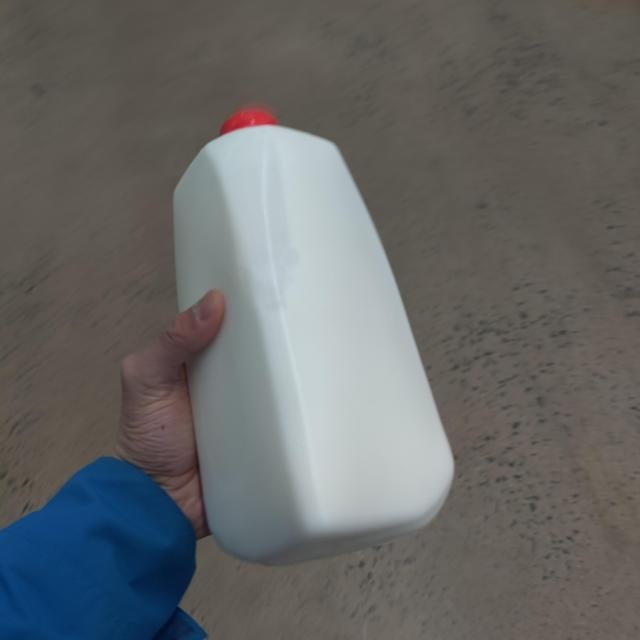

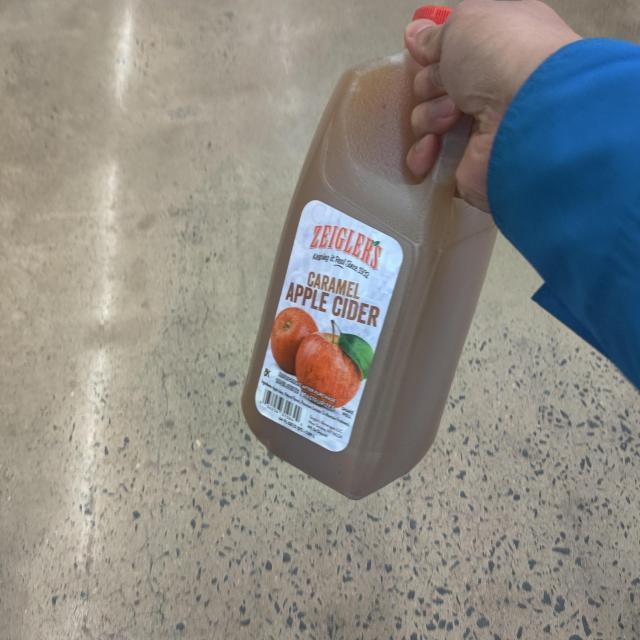

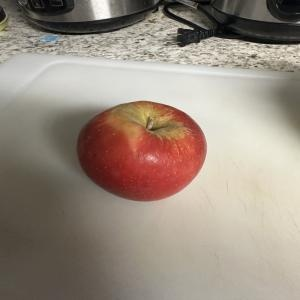

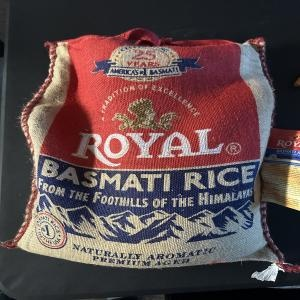

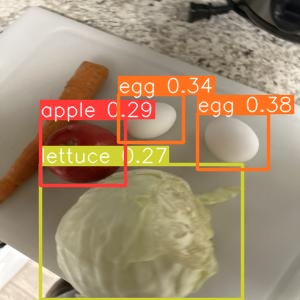

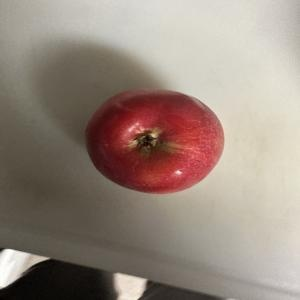

In [54]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/Users/saketh/Documents/Hackathons/FoodSnap/runs/detect/predict2/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred